# 6. Seaborn
* matplotlib를 기반으로 다양한 색상테마와 통계용 그래프 기능을 추가한 시각화 라이브러리
* seaborn에서만 제공되는 통계 기반 plot : countplot, boxplot, violinplot, heatmap
* Dataframe을 이용하여 데이터를 시각화하는데 유용함
* https://seaborn.pydata.org/

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seaborn에서 제공하는 datasets
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
df.shape

(144, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [6]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [7]:
df.year.value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

## 6-1. line Plot
* 선 주위의 파란색은 데이터의 신뢰구간을 표시

<AxesSubplot:xlabel='year', ylabel='passengers'>

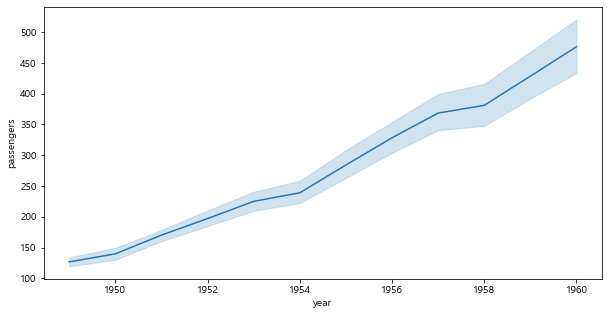

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x = "year",y='passengers', data=df)

<AxesSubplot:xlabel='year', ylabel='passengers'>

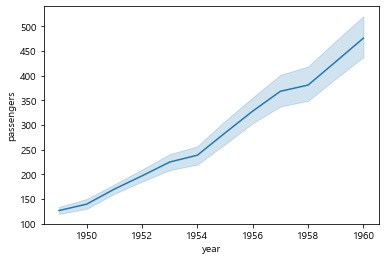

In [9]:
sns.lineplot(x=df.year, y=df.passengers,data=df)

## 6-2. Scatter plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

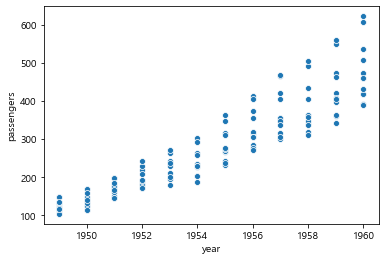

In [10]:
sns.scatterplot(x= 'year',y='passengers',data=df)

<AxesSubplot:xlabel='year', ylabel='passengers'>

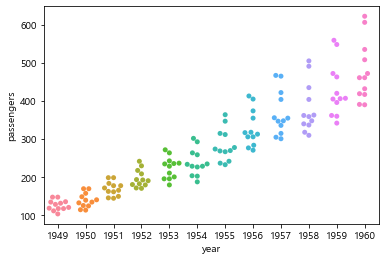

In [11]:
# 겹치지 않게 그려줌
sns.swarmplot(x='year',y='passengers',data=df)

## 6-3. Bar Plot
* x데이터에 대한 y데이터 평균값으로 막대그래프를 그려줌
* 검정색 막대(에러바): 표준편차

<AxesSubplot:xlabel='year', ylabel='passengers'>

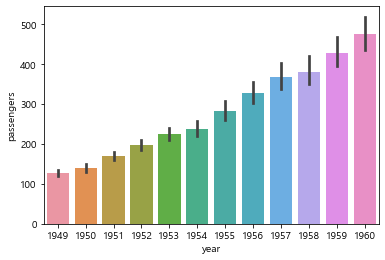

In [12]:
sns.barplot(x='year',y=df.passengers, data=df)

In [13]:
df.loc[df.year==1960, 'passengers'].std()

77.73712501797714

<AxesSubplot:xlabel='year', ylabel='passengers'>

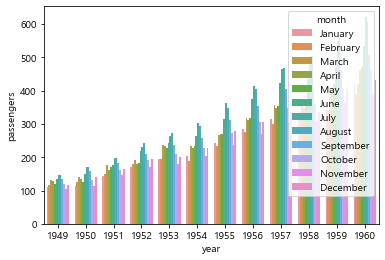

In [14]:
# hue를 지정하면 분류를 한번더 할 수 있음
sns.barplot(x='year',y='passengers',hue='month',data=df)

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='tip'>

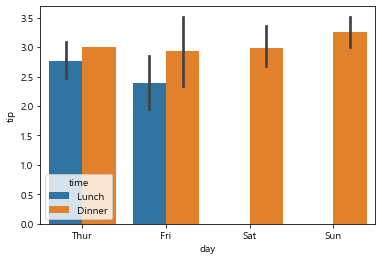

In [16]:
sns.barplot(x='day',y = 'tip',data=tips,hue='time')

## 6-4. Count PLot
* x축에 해당하는 데이터가 몇개 있는지 보여줌

<AxesSubplot:xlabel='year', ylabel='count'>

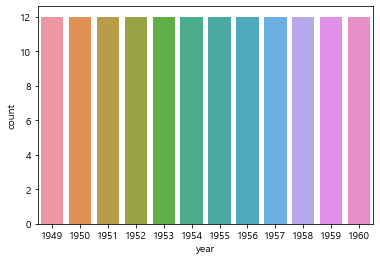

In [17]:
sns.countplot(x='year',data=df)

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


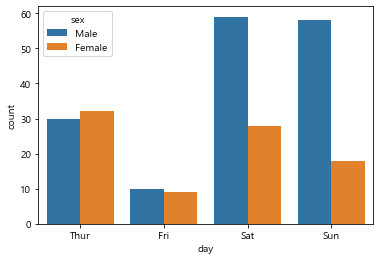

In [24]:
sns.countplot(x="day", data=tips, hue="sex")
plt.show()

## 6-5. Box Plot (Box-and-whisker Plot)
* 평균값, 최소값, 최대값, 중앙값, 제1사분위수, 제3분위수
* 이상치(Outlier)를 감지하는데 사용됨

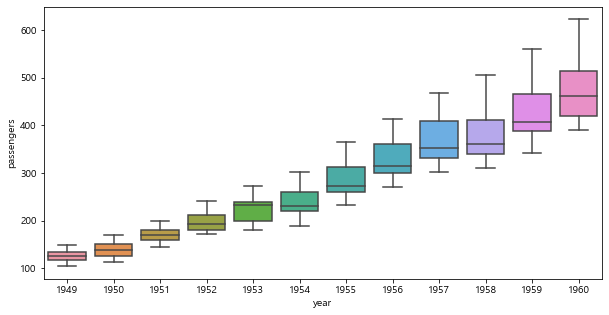

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year',y='passengers',data=df)
plt.show()

In [28]:
df.loc[df.year == 1960].describe()

,year,passengers
count,12.0,12.000000
mean,1960.0,476.166667
std,0.0,77.737125
min,1960.0,390.000000
25%,1960.0,418.500000
50%,1960.0,461.000000
75%,1960.0,514.750000
max,1960.0,622.000000


In [29]:
# IQR(InterQuartile Range) = Q3 - Q1
IQR = 514.75 - 418.5
IQR

96.25

In [30]:
# boxplot의 max값
514.75 + IQR * 1.5

659.125

In [47]:
df.loc[132,'passengers']=700
df.loc[df.year==1960]

,year,month,passengers
132,1960,January,700
133,1960,February,391
134,1960,March,419
135,1960,April,461
136,1960,May,472
137,1960,June,535
138,1960,July,622
139,1960,August,606
140,1960,September,508
141,1960,October,461


## 6-6. Violin Plot

<AxesSubplot:xlabel='year', ylabel='passengers'>

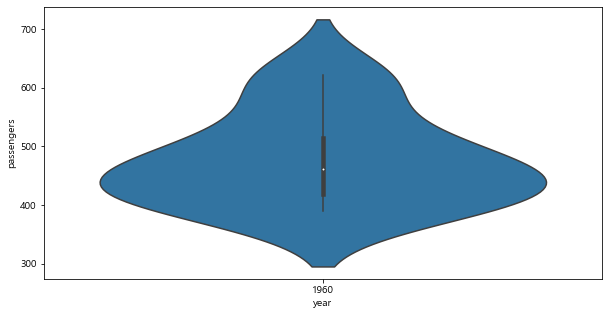

In [34]:
plt.figure(figsize=(10,5))
sns.violinplot(x='year',y='passengers', data=df[df.year==1960])

## 6-7. Heatmap
* 값의 변화를 색상표를 통해 알 수 있음

In [36]:
flights=df.pivot_table(index='month',columns='year',values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

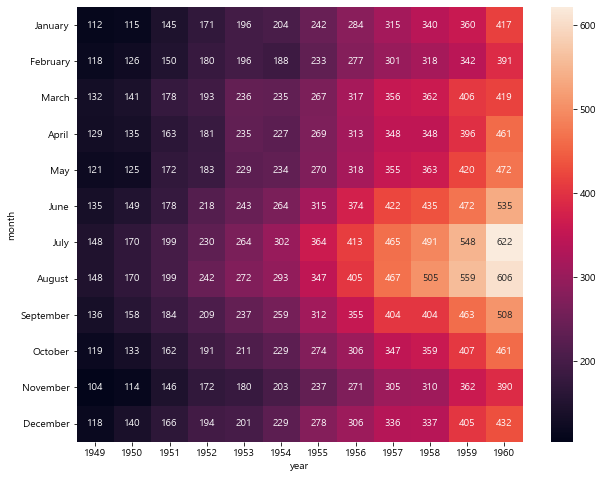

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(data=flights, annot=True,fmt="d") #d:정수 , f: 실수

In [46]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

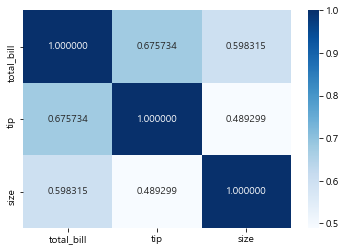

In [53]:
sns.heatmap(data=tips.corr(), annot=True, fmt='f',cmap='Blues')